INTRODUCTION TO EARTH SYSTEM DATA

"Find a data repository/archive serving vector (points, lines, polygons) data. Search, select, download, load/visualise/plot with any of the tools included in the [resources](https://github.com/aprossi/MEGI001-2101033-IntroEarthData/blob/master/resources.md) and document each step. Please document key metadata you encountered. Please document any difficulty encountered in the process and suggestions for mitigation from the data user perspective."

In [ ]:
# Setup Packages and datafile path
%matplotlib inline

from __future__ import (absolute_import, division, print_function)
import os

import matplotlib as mpl
import matplotlib.pyplot as plt

from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame

data_pth = "C:\\Users/Sudha/Documents/intro/10m_physical"


In [14]:
#Load and Examine the simple "rivers_lake_centerlines"  shape file
river_lake = gpd.read_file(os.path.join(data_pth, "ne_10m_rivers_lake_centerlines.shp"))
river_lake.head()

,dissolve,scalerank,featurecla,name,name_alt,rivernum,note,min_zoom,name_en,min_label,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
0,0River,1.0,River,Irrawaddy Delta,None,0,None,2.0,Irrawaddy,3.0,...,Irawadi,Rio Irauádi,Иравади,Irrawaddy,İravadi Nehri,Sông Ayeyarwaddy,伊洛瓦底江,2,1159109417,(LINESTRING (95.45110110768792 17.820502020306...
1,1001Lake Centerline,9.0,Lake Centerline,Tonle Sap,None,1001,None,7.1,None,8.1,...,Tonle Sap,None,Тонлесап,None,None,None,None,4,1159109429,(LINESTRING (103.6874292326879 13.224676824994...
2,1001River,9.0,River,Tonle Sap,None,1001,None,7.1,None,8.1,...,Tonle Sap,None,Тонлесап,None,None,None,None,4,1159109445,LINESTRING (104.6147567066462 12.3820254578065...
3,1002Lake Centerline,9.0,Lake Centerline,Sheksna,None,1002,None,7.1,Sheksna,8.1,...,Szeksna,None,Шексна,Sjeksna,None,None,舍克斯納河,4,1159109447,LINESTRING (37.73951256602123 59.0795352234315...
4,1002River,9.0,River,Sheksna,None,1002,None,7.1,Sheksna,8.1,...,Szeksna,None,Шексна,Sjeksna,None,None,舍克斯納河,4,1159109461,LINESTRING (38.47803795664623 59.2166608744731...


In [5]:
#The crs was read from the shape file’s prj file
river_lake.crs

{'init': 'epsg:4326'}

In [ ]:
Now we finally plot a real map (or blobs, depending on your aesthetics), from a dataset that’s global-scale and stored in “rivers_lake_centerlines” (latitude & longitude) coordinates. 

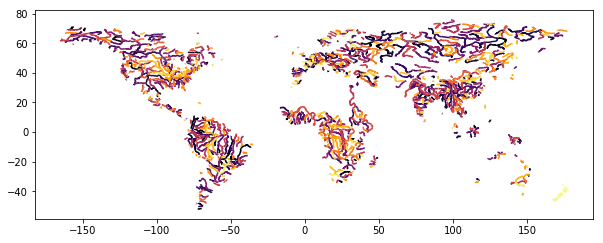

In [23]:
river_lake.plot(cmap='inferno', figsize=(10, 10));

In [ ]:
river_lake_centerlines.shp stores both String and MultiLineString geometry types . We can get at the geometry types and other geometry properties easily.

In [7]:
river_lake.geom_type

0       MultiLineString
1       MultiLineString
2            LineString
3            LineString
4            LineString
5            LineString
6       MultiLineString
7            LineString
8            LineString
9            LineString
10      MultiLineString
11           LineString
12           LineString
13           LineString
14           LineString
15           LineString
16           LineString
17           LineString
18           LineString
19           LineString
20           LineString
21           LineString
22           LineString
23           LineString
24           LineString
25           LineString
26      MultiLineString
27           LineString
28      MultiLineString
29      MultiLineString
             ...       
1425         LineString
1426         LineString
1427         LineString
1428         LineString
1429         LineString
1430         LineString
1431         LineString
1432         LineString
1433         LineString
1434         LineString
1435         Lin

In [19]:
type(river_lake)

geopandas.geodataframe.GeoDataFrame

Load “Natural Earth” countries dataset, bundled with GeoPandas

“Natural Earth is a public domain map dataset available at 1:10m, 1:50m, and 1:110 million scales. Featuring tightly integrated vector and raster data, with Natural Earth you can make a variety of visually pleasing, well-crafted maps with cartography or GIS software.” A subset comes bundled with GeoPandas and is accessible from the gpd.datasets module. We’ll use it as a helpful global base layer map.

In [8]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [9]:
world.head(2)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...


In [ ]:
Its CRS is also EPSG:4326

In [10]:
world.crs

{'init': 'epsg:4326'}

Map plot overlays: Plotting multiple spatial layers
Here’s a compact, quick way of using the GeoDataFrame plot method to overlay two GeoDataFrames while customizing the styles for each layer.

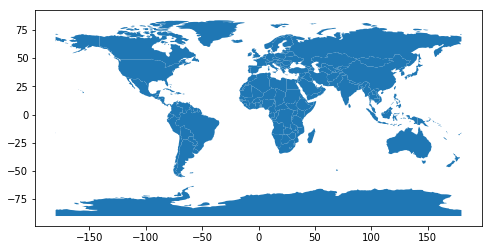

In [11]:
world.plot(figsize=(8, 8));

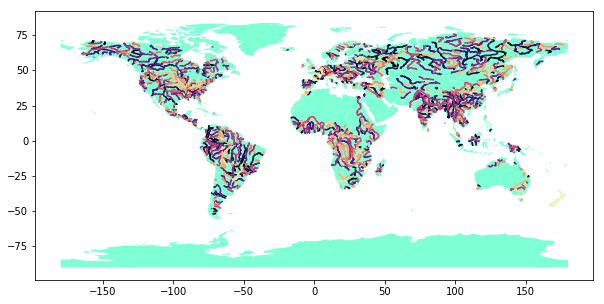

In [30]:
world.plot(ax=river_lake.plot(cmap='magma', figsize=(10, 10)), facecolor='aquamarine');


We can also compose the plot using conventional matplotlib steps and options that give us more control.

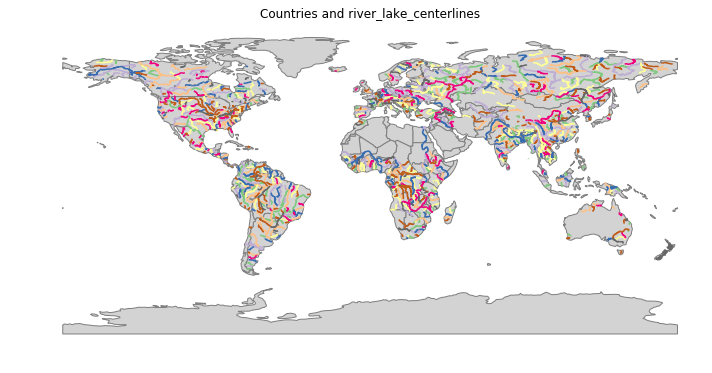

In [20]:
f, ax = plt.subplots(1, figsize=(12, 6))
ax.set_title('Countries and river_lake_centerlines')
# Other nice categorical color maps (cmap) include 'magma','Accent' 
river_lake.plot(ax=ax, cmap='Accent')
world.plot(ax=ax, facecolor='lightgray', edgecolor='gray')
ax.set_ylim([-90, 90])
ax.set_axis_off()
plt.axis('equal');